## Feature ranking

### Summary

We rank features according to predict potential for cumulative oil production and permeability.  

For permeability: Porosity, Young's modulus and Compression velocity may contain the most information.  
For cumulative oil production (1 yr): Permeability, Shear Modulus, and Young's modulus contain much information.  
Facies data not considered.


### Permeability
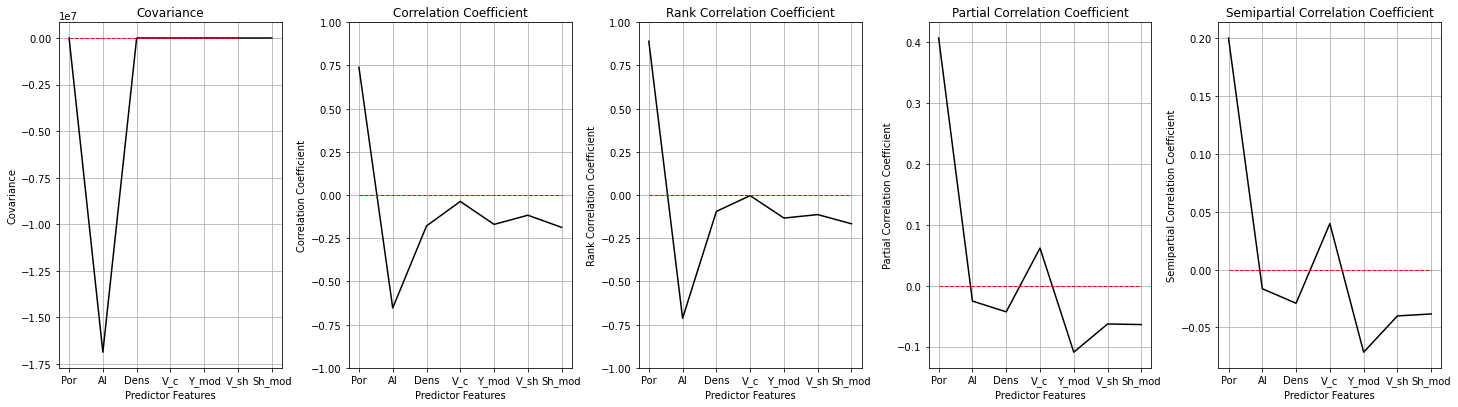

### Cumulative Oil Production
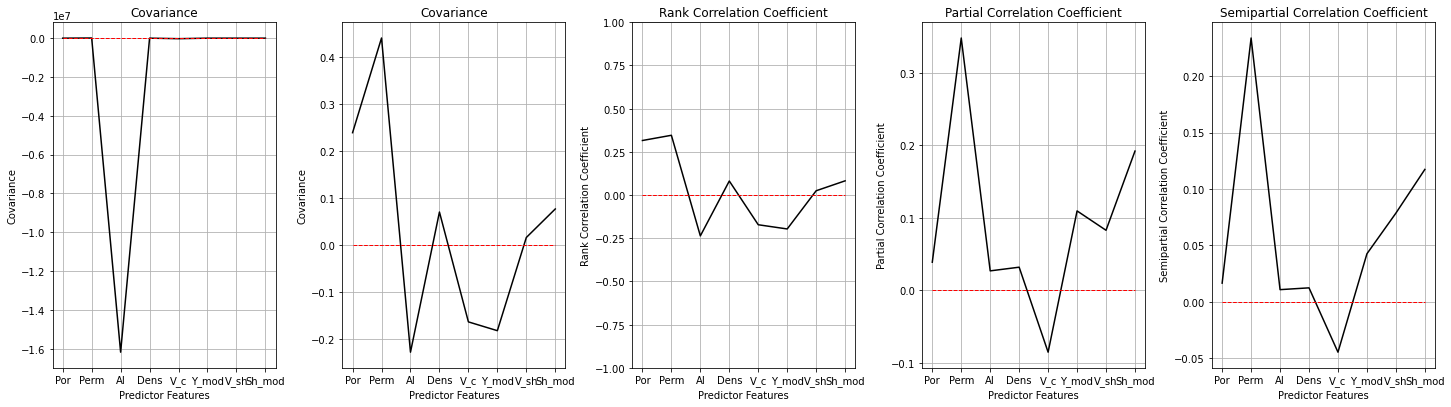

Import necessary packages

In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # ndarrays for gridded data
import pandas as pd                                         # DataFrames for tabular data
import matplotlib.pyplot as plt                             # for visualizing data
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy import linalg   

Read producer and cumulative oil files

In [5]:
# Read producer
prod = pd.read_csv("https://raw.githubusercontent.com/PGEHackathon/darcy-analytics/data_exp/wellbore_data_producer_wells.csv?token=AN5MCLBHM2IYJT6OO42JN43AQDE4U")  # read a .csv file in as a DataFrame
# Read cumulative oil
cumoil = pd.read_csv('https://raw.githubusercontent.com/PGEHackathon/darcy-analytics/data_exp/production_history.csv?token=AN5MCLGECACCOYCJDAQCPYTAQDFCE')

Look at the head of the cumulative oil files

In [11]:
cumoil.head()

,Well_ID,"Cumulative oil production (1 yr), MSTB","Cumulative oil production (2 yr), MSTB","Cumulative oil production (3 yr), MSTB","Cumulative Water production (1 yr), MSTB","Cumulative Water production (2 yr), MSTB","Cumulative Water production (3 yr), MSTB"
0,Well_no_1,450.98,684.20,847.33,494.89,1236.40,2108.7
1,Well_no_2,594.43,946.61,1201.20,226.97,646.50,1187.7
2,Well_no_3,381.75,611.38,781.40,393.17,948.18,1603.1
3,Well_no_4,795.82,1262.80,1573.20,253.25,782.38,1502.9
4,Well_no_5,259.90,426.42,548.68,523.66,1187.00,1932.5


Look at the head of the production files

In [7]:
prod.head()

,Well_ID,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2",Rock facies,"Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa"
0,Well_no_1,7325,7175,3052.8,0.13330,NaN,6981171.853,Sandstone,2.280137,3106.544655,24.721555,1690.417133,7.304717
1,Well_no_1,7325,7175,3053.3,0.13865,NaN,7234748.871,Sandstone,2.135061,4003.697087,23.360728,1573.847967,5.202120
2,Well_no_1,7325,7175,3053.8,0.14638,NaN,7157383.755,Sandstone,1.991045,3462.569030,28.232152,1636.279139,NaN
3,Well_no_1,7325,7175,3054.3,NaN,NaN,NaN,Sandstone,1.694242,3836.960702,29.220132,1613.043048,5.074763
4,Well_no_1,7325,7175,3054.8,0.14993,NaN,NaN,Sandstone,1.664371,3919.585777,NaN,1636.846284,5.277834


Join the files based on the well_ID

In [8]:
# Join on Well_ID (Left outer join)
df = pd.merge(prod, cumoil, on='Well_ID',how='left')
df.head()


,Well_ID,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2",Rock facies,"Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa","Cumulative oil production (1 yr), MSTB","Cumulative oil production (2 yr), MSTB","Cumulative oil production (3 yr), MSTB","Cumulative Water production (1 yr), MSTB","Cumulative Water production (2 yr), MSTB","Cumulative Water production (3 yr), MSTB"
0,Well_no_1,7325,7175,3052.8,0.13330,NaN,6981171.853,Sandstone,2.280137,3106.544655,24.721555,1690.417133,7.304717,450.98,684.2,847.33,494.89,1236.4,2108.7
1,Well_no_1,7325,7175,3053.3,0.13865,NaN,7234748.871,Sandstone,2.135061,4003.697087,23.360728,1573.847967,5.202120,450.98,684.2,847.33,494.89,1236.4,2108.7
2,Well_no_1,7325,7175,3053.8,0.14638,NaN,7157383.755,Sandstone,1.991045,3462.569030,28.232152,1636.279139,NaN,450.98,684.2,847.33,494.89,1236.4,2108.7
3,Well_no_1,7325,7175,3054.3,NaN,NaN,NaN,Sandstone,1.694242,3836.960702,29.220132,1613.043048,5.074763,450.98,684.2,847.33,494.89,1236.4,2108.7
4,Well_no_1,7325,7175,3054.8,0.14993,NaN,NaN,Sandstone,1.664371,3919.585777,NaN,1636.846284,5.277834,450.98,684.2,847.33,494.89,1236.4,2108.7


One Hot Encode categorical attributes (Rock facies)


In [9]:
df2=df.drop(['Well_ID','Rock facies'],axis=1)
df2 = df2.iloc[:,3:-5]
df2.head()

,"Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa","Cumulative oil production (1 yr), MSTB"
0,0.13330,NaN,6981171.853,2.280137,3106.544655,24.721555,1690.417133,7.304717,450.98
1,0.13865,NaN,7234748.871,2.135061,4003.697087,23.360728,1573.847967,5.202120,450.98
2,0.14638,NaN,7157383.755,1.991045,3462.569030,28.232152,1636.279139,NaN,450.98
3,NaN,NaN,NaN,1.694242,3836.960702,29.220132,1613.043048,5.074763,450.98
4,0.14993,NaN,NaN,1.664371,3919.585777,NaN,1636.846284,5.277834,450.98


Instantiate scalar class and fit on data

In [10]:

scaler = StandardScaler()

df2_std = scaler.fit_transform(df2)
df2_std = pd.DataFrame(df2_std, columns=df2.columns)

Create a pairplot

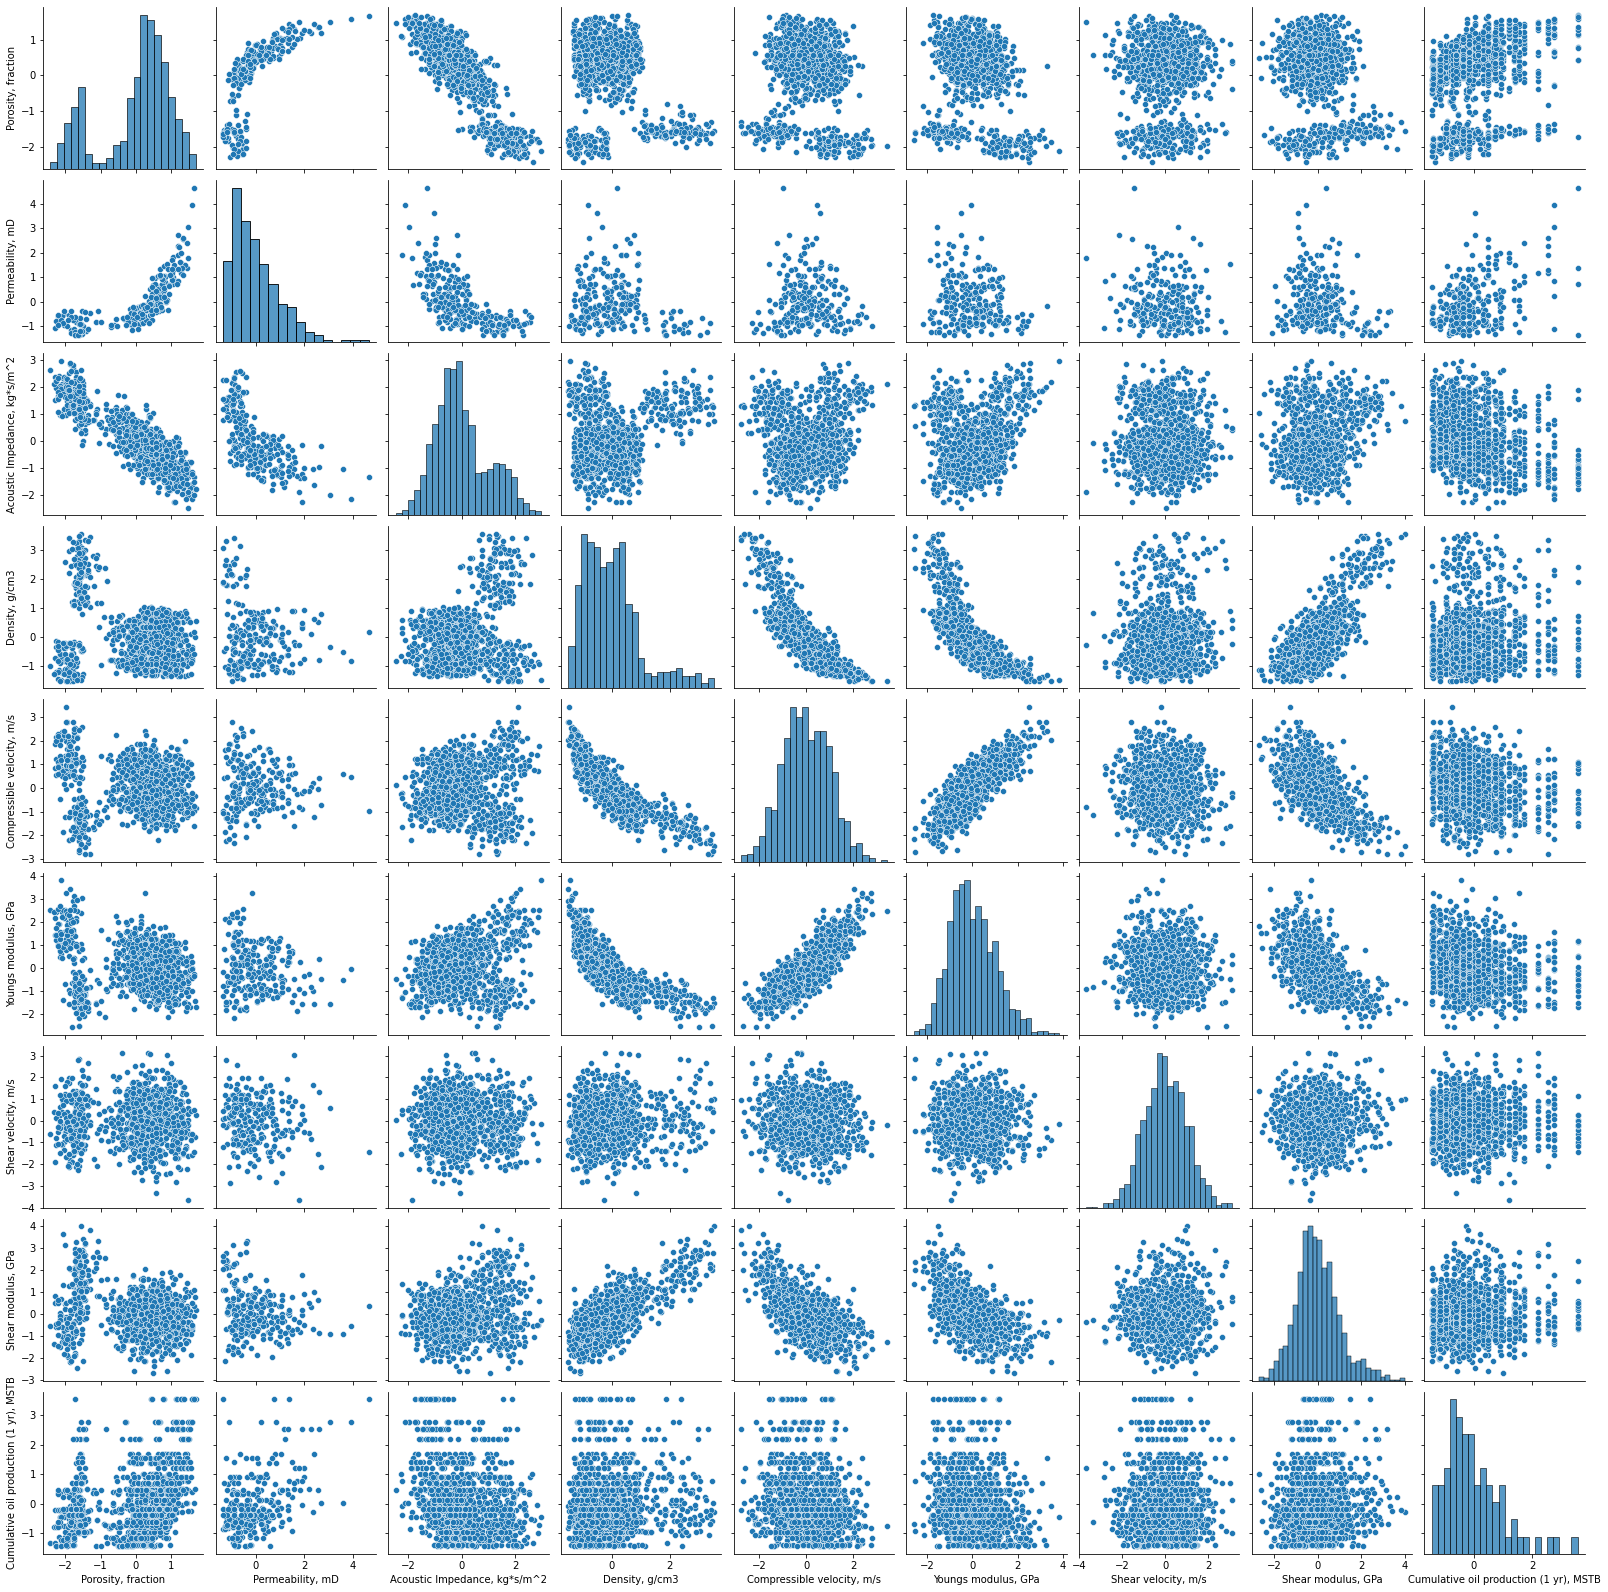

In [11]:
sns.pairplot(df2_std, vars=df2_std.columns, markers = "o")

## Feature Ranking

Perform covariance calculations

In [12]:
covariance = df2.cov().loc[:,['Permeability, mD','Cumulative oil production (1 yr), MSTB']]
covariance

,"Permeability, mD","Cumulative oil production (1 yr), MSTB"
"Porosity, fraction",2.193064e+00,1.962994e+00
"Permeability, mD",6.543910e+03,8.017265e+03
"Acoustic Impedance, kg*s/m^2",-1.687387e+07,-1.618434e+07
"Density, g/cm3",-6.152738e+00,6.599887e+00
"Compressible velocity, m/s",-2.020291e+03,-2.678316e+04
"Youngs modulus, GPa",-7.246919e+01,-2.241550e+02
"Shear velocity, m/s",-9.649752e+02,3.643349e+02
"Shear modulus, GPa",-2.345177e+01,2.625422e+01
"Cumulative oil production (1 yr), MSTB",8.017265e+03,5.146955e+04


Perform correlation measurements

In [14]:
std_corr = df2_std.corr().loc[:,['Permeability, mD','Cumulative oil production (1 yr), MSTB']]
std_corr

,"Permeability, mD","Cumulative oil production (1 yr), MSTB"
"Porosity, fraction",0.739573,0.238922
"Permeability, mD",1.000000,0.440140
"Acoustic Impedance, kg*s/m^2",-0.653252,-0.227484
"Density, g/cm3",-0.178500,0.070356
"Compressible velocity, m/s",-0.036582,-0.163101
"Youngs modulus, GPa",-0.169565,-0.181783
"Shear velocity, m/s",-0.116603,0.016193
"Shear modulus, GPa",-0.186816,0.076836
"Cumulative oil production (1 yr), MSTB",0.440140,1.000000


Permeability, Porosity and Acoustic Impedance best linear relationship with cumulative oil.  
Porosity and Acoustic Impedance best linear relationship with permeability.

Calculate the Spearman Rank Coefficient

In [15]:
stand_rank_correlation, stand_rank_correlation_pval = stats.spearmanr(df2_std, nan_policy='omit')

stand_rank_correlation = pd.DataFrame(stand_rank_correlation, columns=df2_std.columns, index=df2_std.columns)
tmp = stand_rank_correlation.loc[:,['Permeability, mD','Cumulative oil production (1 yr), MSTB']]
tmp.sort_values(by=['Cumulative oil production (1 yr), MSTB'], ascending=False)

,"Permeability, mD","Cumulative oil production (1 yr), MSTB"
"Cumulative oil production (1 yr), MSTB",0.346120,1.000000
"Permeability, mD",1.000000,0.346120
"Porosity, fraction",0.890404,0.315930
"Shear modulus, GPa",-0.166004,0.082534
"Density, g/cm3",-0.094427,0.081487
"Shear velocity, m/s",-0.112821,0.025137
"Compressible velocity, m/s",-0.003052,-0.171612
"Youngs modulus, GPa",-0.132961,-0.195970
"Acoustic Impedance, kg*s/m^2",-0.712823,-0.236079


Best monotonic relationship with Cumu Oil: Perm, Por, Youngs Modulus  
Best monotonic relationship with Perm: Por, AI  
Caution: Omit NaNs

Develop Functions for Partial Correlation and Semipartial Correlation. 

Credit goes to Dr. Michael Pyrcz, UT Austin and Fabian Pedregosa-Izquierdo

In [16]:
def partial_corr(C):
#    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
#    for the remaining variables in C.

#    Parameters
#    C : array-like, shape (n, p)
#        Array with the different variables. Each column of C is taken as a variable
#    Returns
#    P : array-like, shape (p, p)
#        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
#        for the remaining variables in C.

    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

def semipartial_corr(C): # Michael Pyrcz modified the function above by Fabian Pedregosa-Izquierdo, f@bianp.net for semipartial correlation
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] # just use the value, not a residual
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

Calculate the partial correlation

In [17]:
std_partial_correlation = partial_corr(df2_std.dropna()) # calculate the partial correlation coefficients

std_partial_correlation = pd.DataFrame(std_partial_correlation, columns=df2_std.columns, index=df2_std.columns)
tmp = std_partial_correlation.loc[:,['Permeability, mD','Cumulative oil production (1 yr), MSTB']]
tmp.sort_values(by=['Cumulative oil production (1 yr), MSTB'], ascending=False)
#tmp.sort_values(by=['Permeability, mD'], ascending=False)

,"Permeability, mD","Cumulative oil production (1 yr), MSTB"
"Cumulative oil production (1 yr), MSTB",0.347752,1.000000
"Permeability, mD",1.000000,0.347752
"Shear modulus, GPa",-0.063833,0.192000
"Youngs modulus, GPa",-0.109186,0.109570
"Shear velocity, m/s",-0.062882,0.082913
"Porosity, fraction",0.406569,0.038917
"Density, g/cm3",-0.042932,0.032057
"Acoustic Impedance, kg*s/m^2",-0.025310,0.026997
"Compressible velocity, m/s",0.061717,-0.085011


Best relationship for Cumulative: Perm, Shear, Youngs  
Best relationship for Permeability: Por, Youngs  
Caution: Drop NaN

Calculate the Semipartial Correlation

In [19]:
std_semipartial_correlation = semipartial_corr(df2_std.dropna()) # calculate the partial correlation coefficients
std_semipartial_correlation = pd.DataFrame(std_semipartial_correlation, columns=df2_std.columns, index=df2_std.columns)
tmp = std_semipartial_correlation.loc[:,['Permeability, mD','Cumulative oil production (1 yr), MSTB']]
tmp.sort_values(by=['Cumulative oil production (1 yr), MSTB'], ascending=False)

,"Permeability, mD","Cumulative oil production (1 yr), MSTB"
"Cumulative oil production (1 yr), MSTB",0.233757,1.000000
"Permeability, mD",1.000000,0.233757
"Shear modulus, GPa",-0.038301,0.117284
"Shear velocity, m/s",-0.040016,0.078532
"Youngs modulus, GPa",-0.071379,0.042513
"Porosity, fraction",0.200398,0.016493
"Density, g/cm3",-0.029065,0.012323
"Acoustic Impedance, kg*s/m^2",-0.016467,0.010727
"Compressible velocity, m/s",0.039912,-0.044701


Best for Cumu Oil: Perm, Shear   
Best for Perm: Por  
Caution: Drop NaN

## Feature Ranking Plot for Permeability

Understand the covariance attributes

In [20]:
covariance

,"Permeability, mD","Cumulative oil production (1 yr), MSTB"
"Porosity, fraction",2.193064e+00,1.962994e+00
"Permeability, mD",6.543910e+03,8.017265e+03
"Acoustic Impedance, kg*s/m^2",-1.687387e+07,-1.618434e+07
"Density, g/cm3",-6.152738e+00,6.599887e+00
"Compressible velocity, m/s",-2.020291e+03,-2.678316e+04
"Youngs modulus, GPa",-7.246919e+01,-2.241550e+02
"Shear velocity, m/s",-9.649752e+02,3.643349e+02
"Shear modulus, GPa",-2.345177e+01,2.625422e+01
"Cumulative oil production (1 yr), MSTB",8.017265e+03,5.146955e+04


Drop certain attributes for the covariance and features

In [23]:
covariance.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD']
features = ['Por','AI','Dens','V_c','Y_mod','V_sh','Sh_mod']

Create the covariance plot

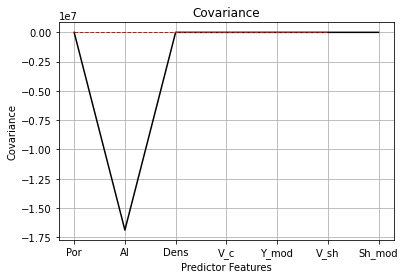

In [24]:
plt.plot(features,
         covariance.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Covariance')
t = plt.title('Covariance')
#plt.ylim(-5000,5000)
plt.grid(True)

Assess the standard correlation values

In [25]:
std_corr

,"Permeability, mD","Cumulative oil production (1 yr), MSTB"
"Porosity, fraction",0.739573,0.238922
"Permeability, mD",1.000000,0.440140
"Acoustic Impedance, kg*s/m^2",-0.653252,-0.227484
"Density, g/cm3",-0.178500,0.070356
"Compressible velocity, m/s",-0.036582,-0.163101
"Youngs modulus, GPa",-0.169565,-0.181783
"Shear velocity, m/s",-0.116603,0.016193
"Shear modulus, GPa",-0.186816,0.076836
"Cumulative oil production (1 yr), MSTB",0.440140,1.000000


Plot the Correlation Coefficient

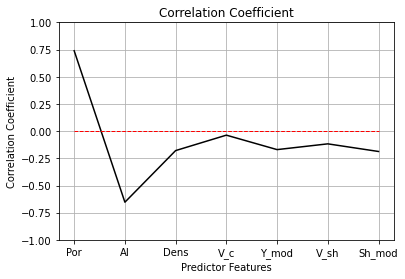

In [26]:
plt.plot(features,
         std_corr.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Correlation Coefficient')
t = plt.title('Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

Drop certain features from the standard rank correlation

In [27]:
stand_rank_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD']

Porosity, fraction              0.890404
Acoustic Impedance, kg*s/m^2   -0.712823
Density, g/cm3                 -0.094427
Compressible velocity, m/s     -0.003052
Youngs modulus, GPa            -0.132961
Shear velocity, m/s            -0.112821
Shear modulus, GPa             -0.166004
Name: Permeability, mD, dtype: float64

Make plots for the Rank Correlation Coefficient

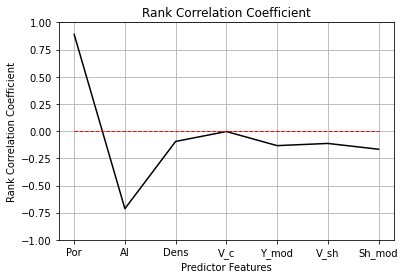

In [28]:
plt.plot(features,
         stand_rank_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Rank Correlation Coefficient')
t = plt.title('Rank Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)


Drop features from the Standard Partial Correlation

In [29]:
std_partial_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD']

Porosity, fraction              0.406569
Acoustic Impedance, kg*s/m^2   -0.025310
Density, g/cm3                 -0.042932
Compressible velocity, m/s      0.061717
Youngs modulus, GPa            -0.109186
Shear velocity, m/s            -0.062882
Shear modulus, GPa             -0.063833
Name: Permeability, mD, dtype: float64

Plot the Partial Correlation Coefficient

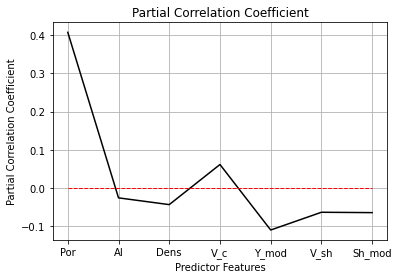

In [30]:
plt.plot(features,
         std_partial_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Partial Correlation Coefficient')
t = plt.title('Partial Correlation Coefficient')
plt.grid(True)

Drop values from the Semipartial Correlation

In [31]:
std_semipartial_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD']

Porosity, fraction              0.200398
Acoustic Impedance, kg*s/m^2   -0.016467
Density, g/cm3                 -0.029065
Compressible velocity, m/s      0.039912
Youngs modulus, GPa            -0.071379
Shear velocity, m/s            -0.040016
Shear modulus, GPa             -0.038301
Name: Permeability, mD, dtype: float64

Create the semipartial correlation plot

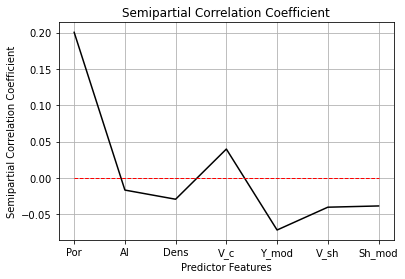

In [32]:
plt.plot(features,
         std_semipartial_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Semipartial Correlation Coefficient')
t = plt.title('Semipartial Correlation Coefficient')
plt.grid(True)

Create plots for Covariance, Correlation Coefficient, Rank Correlation Coefficient, Partial Correlation Coefficient, and Semipartial Correlation Coefficient

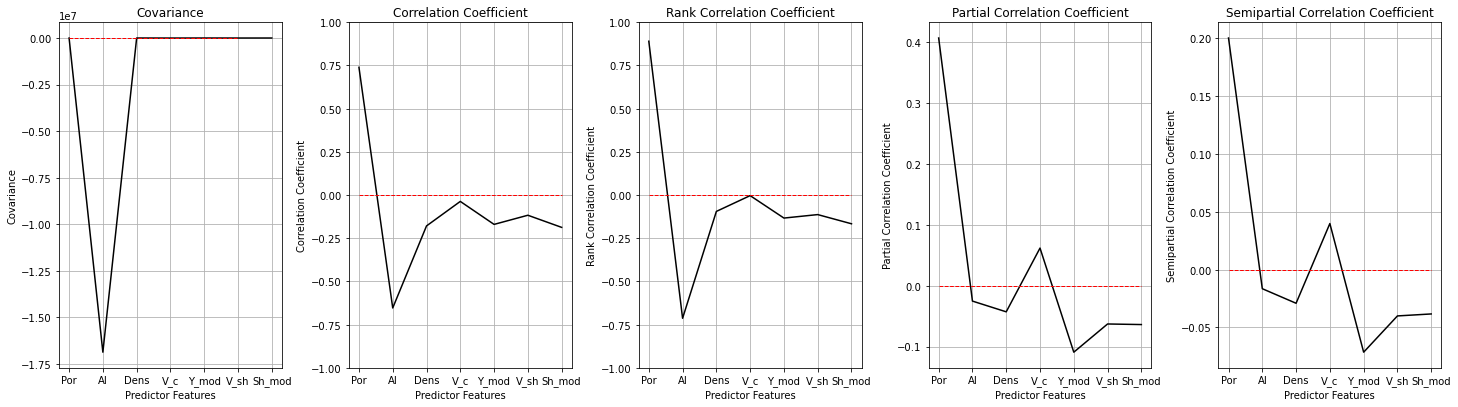

<Figure size 432x288 with 0 Axes>

In [33]:

plt.subplot(151)
plt.plot(features,
         covariance.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Covariance')
t = plt.title('Covariance')
#plt.ylim(-5000,5000)
plt.grid(True)

plt.subplot(152)
plt.plot(features,
         std_corr.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Correlation Coefficient')
t = plt.title('Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(153)
plt.plot(features,
         stand_rank_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Rank Correlation Coefficient')
t = plt.title('Rank Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)


plt.subplot(154)
plt.plot(features,
         std_partial_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Partial Correlation Coefficient')
t = plt.title('Partial Correlation Coefficient')
plt.grid(True)

plt.subplot(155)
plt.plot(features,
         std_semipartial_correlation.drop(['Permeability, mD','Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Permeability, mD'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Semipartial Correlation Coefficient')
t = plt.title('Semipartial Correlation Coefficient')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()
plt.clf()

Drop the covariance values

In [37]:
covariance.drop(['Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Cumulative oil production (1 yr), MSTB'],

(Porosity, fraction              1.962994e+00
 Permeability, mD                8.017265e+03
 Acoustic Impedance, kg*s/m^2   -1.618434e+07
 Density, g/cm3                  6.599887e+00
 Compressible velocity, m/s     -2.678316e+04
 Youngs modulus, GPa            -2.241550e+02
 Shear velocity, m/s             3.643349e+02
 Shear modulus, GPa              2.625422e+01
 Name: Cumulative oil production (1 yr), MSTB, dtype: float64,)

Create plots for Covariance, Correlation Coefficient, Rank Correlation Coefficient, Partial Correlation Coefficient, and Semipartial Correlation Coefficient

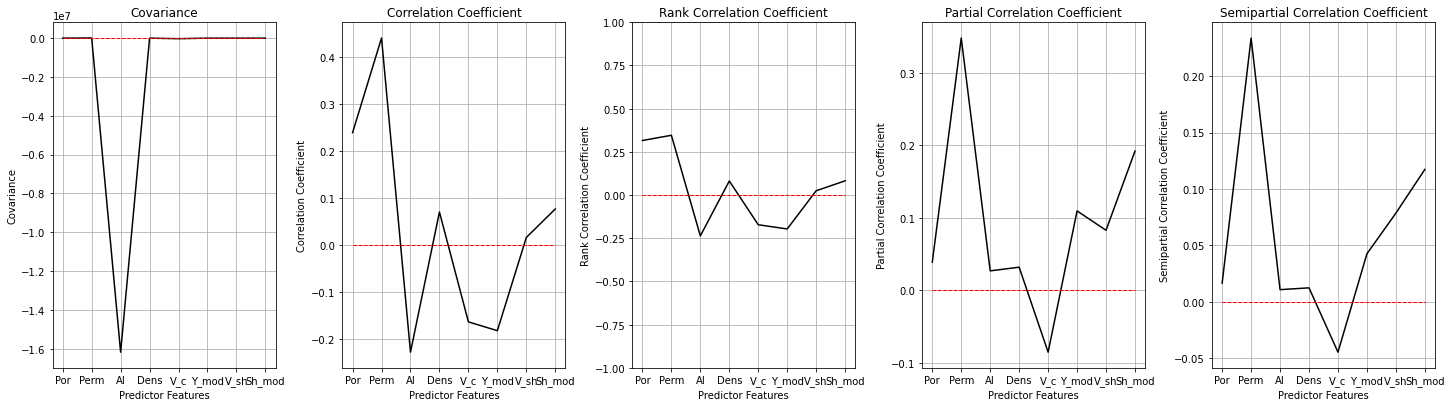

In [36]:
t='Cumulative oil production (1 yr), MSTB'
features = ['Por','Perm','AI','Dens','V_c','Y_mod','V_sh','Sh_mod']
plt.subplot(151)
plt.plot(features,
         covariance.drop(['Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Cumulative oil production (1 yr), MSTB'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Covariance')
t = plt.title('Covariance')
#plt.ylim(-5000,5000)
plt.grid(True)

plt.subplot(152)
plt.plot(features,
         std_corr.drop(['Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Cumulative oil production (1 yr), MSTB'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Correlation Coefficient')
t = plt.title('Correlation Coefficient')
#plt.ylim(-5000,5000)
plt.grid(True)

plt.subplot(153)
plt.plot(features,
         stand_rank_correlation.drop(['Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Cumulative oil production (1 yr), MSTB'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Rank Correlation Coefficient')
t = plt.title('Rank Correlation Coefficient')
plt.ylim(-1,1)
plt.grid(True)


plt.subplot(154)
plt.plot(features,
         std_partial_correlation.drop(['Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Cumulative oil production (1 yr), MSTB'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Partial Correlation Coefficient')
t = plt.title('Partial Correlation Coefficient')
plt.grid(True)

plt.subplot(155)
plt.plot(features,
         std_semipartial_correlation.drop(['Cumulative oil production (1 yr), MSTB'],axis=0).loc[:,'Cumulative oil production (1 yr), MSTB'],
         color='black')
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0)
plt.xlabel('Predictor Features')
plt.ylabel('Semipartial Correlation Coefficient')
t = plt.title('Semipartial Correlation Coefficient')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()